In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
# loading the dataset

df = pd.read_csv('D:\project datasets\pcos_dataset.csv')

In [3]:
df.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


In [4]:
df.describe()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.771000,26.38700,0.530000,60.159500,17.469000,0.199000
std,8.463462,4.93554,0.499349,23.160204,7.069301,0.399448
min,18.000000,18.10000,0.000000,20.000000,5.000000,0.000000
25%,24.000000,21.90000,0.000000,41.700000,12.000000,0.000000
50%,32.000000,26.40000,1.000000,60.000000,18.000000,0.000000
75%,39.000000,30.50000,1.000000,80.300000,23.250000,0.000000
max,45.000000,35.00000,1.000000,99.800000,29.000000,1.000000


In [5]:
df.shape

(1000, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [7]:
df.isnull().sum()

Age                          0
BMI                          0
Menstrual_Irregularity       0
Testosterone_Level(ng/dL)    0
Antral_Follicle_Count        0
PCOS_Diagnosis               0
dtype: int64

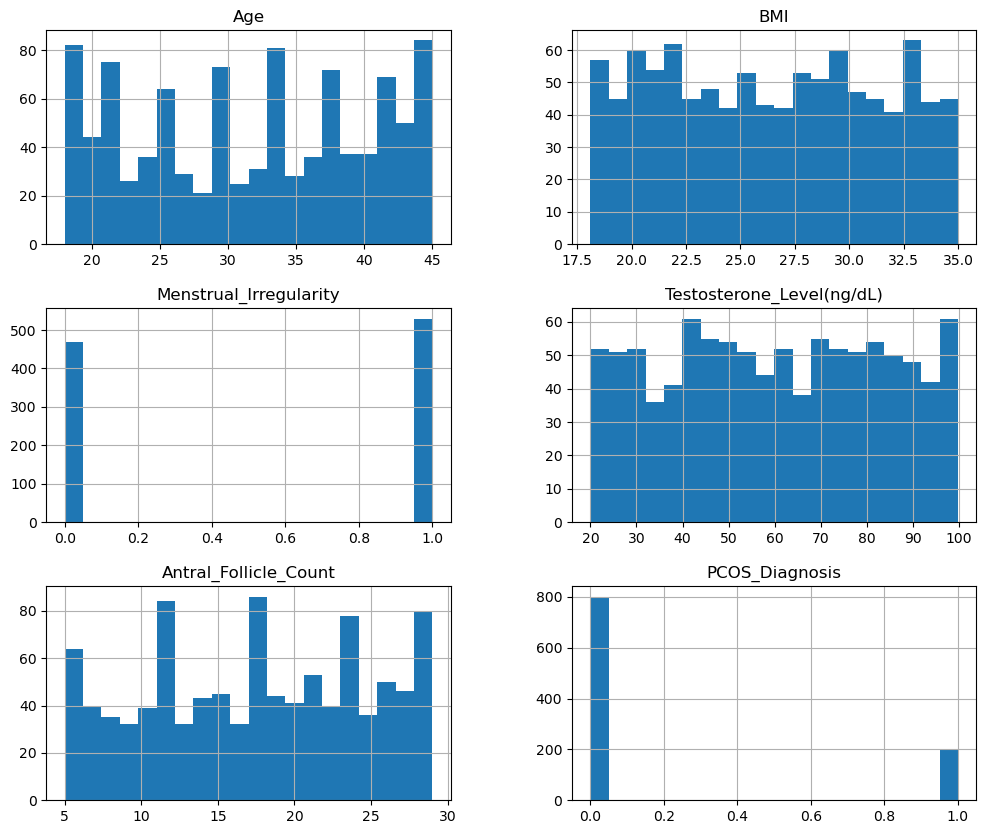

In [9]:
# data visualizations

df.hist(figsize=(12, 10), bins=20)
plt.show()

In [10]:
df.skew()

Age                         -0.060402
BMI                          0.023830
Menstrual_Irregularity      -0.120397
Testosterone_Level(ng/dL)   -0.019327
Antral_Follicle_Count       -0.076407
PCOS_Diagnosis               1.510101
dtype: float64

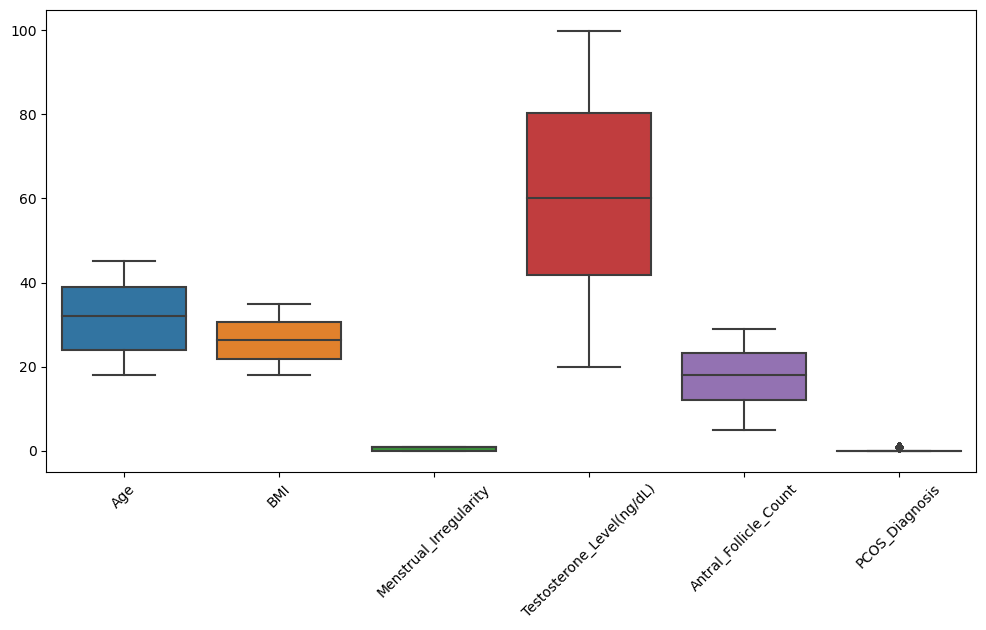

In [11]:
# box plots

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

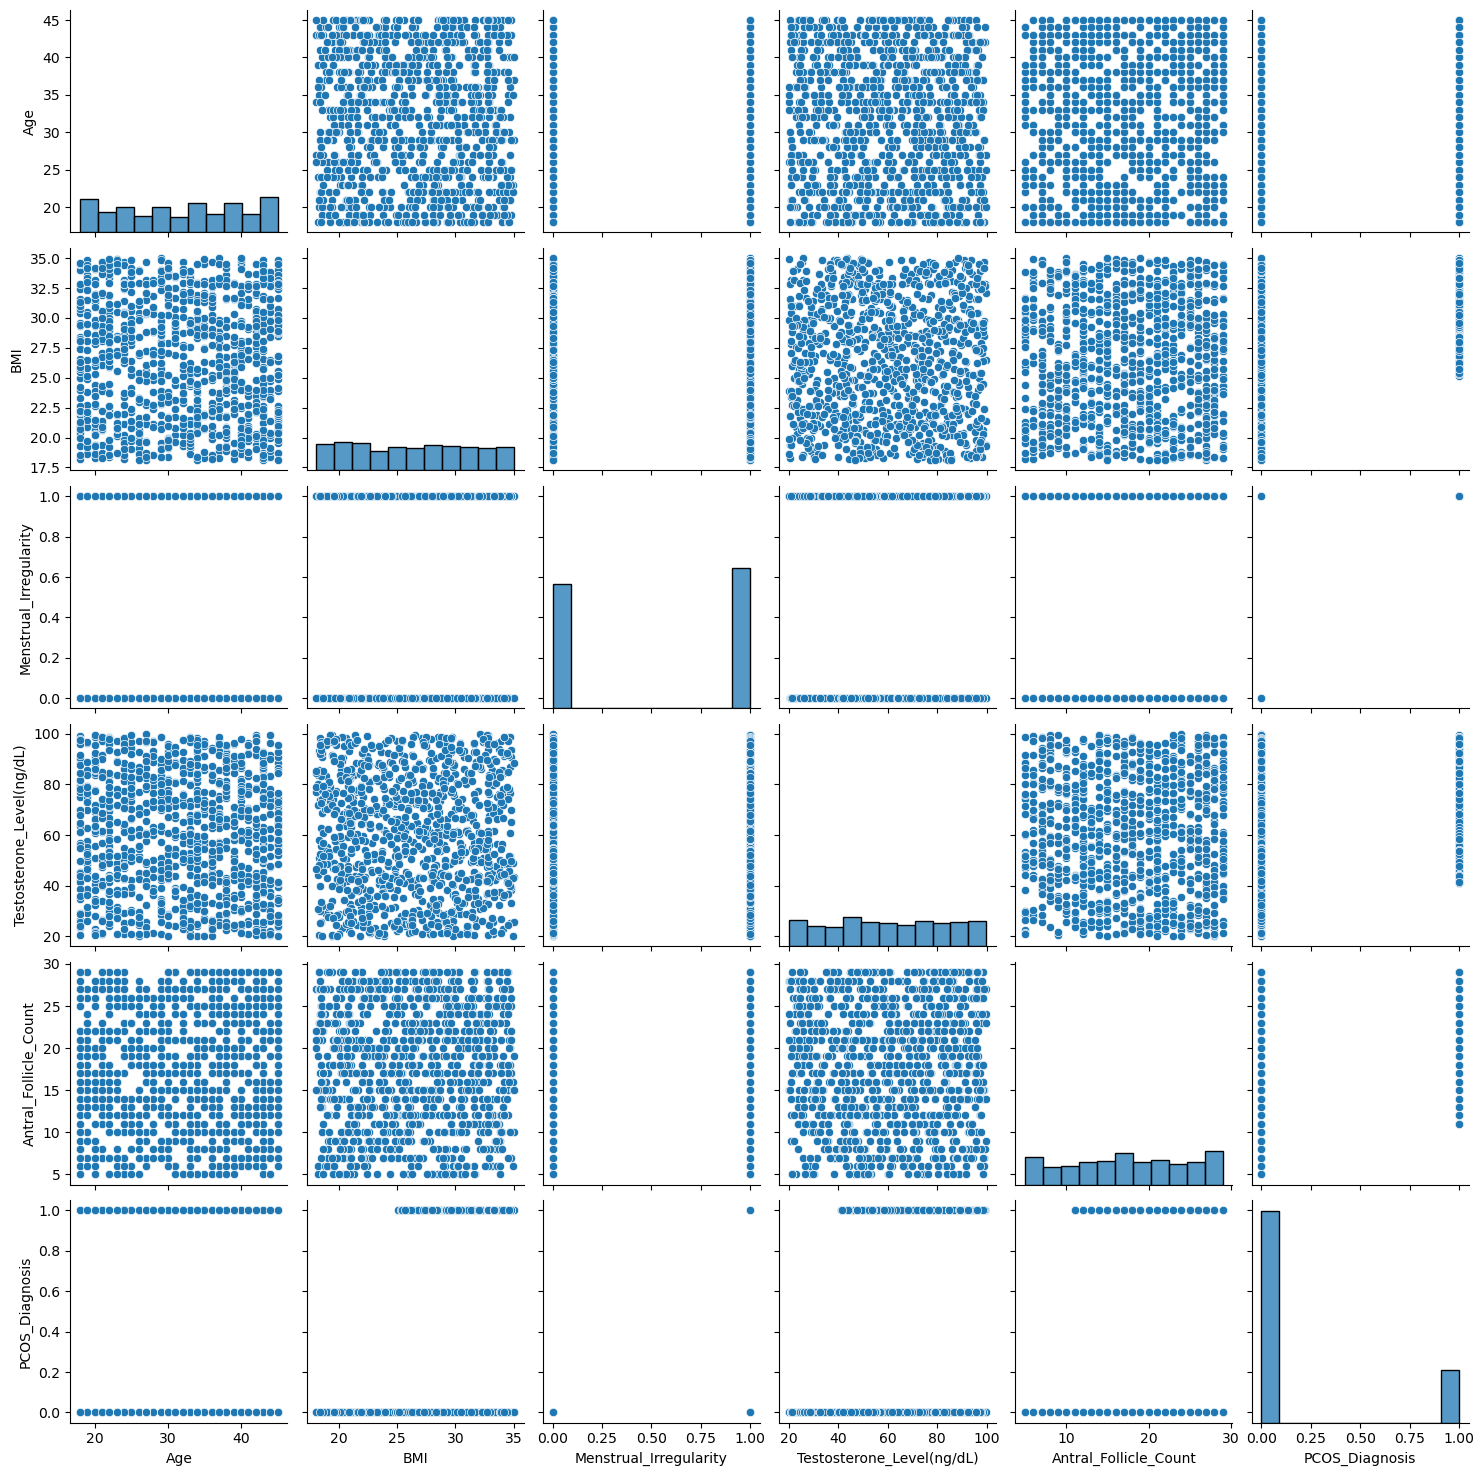

In [16]:
# pairplot

sns.pairplot(df)
plt.show()

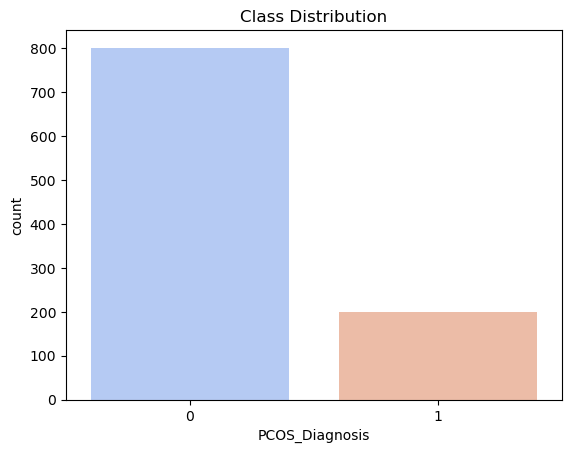

In [21]:
sns.countplot(x=df['PCOS_Diagnosis'], palette="coolwarm")
plt.title("Class Distribution")
plt.show()

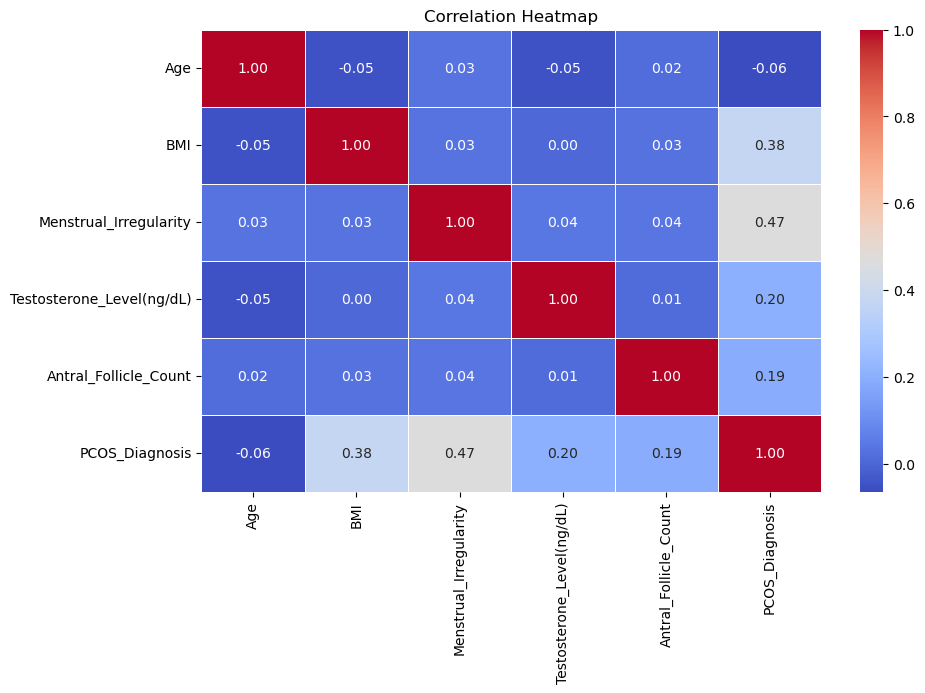

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [23]:
# Splitting data

X = df.drop(columns=['PCOS_Diagnosis'])  # Features
y = df['PCOS_Diagnosis']  # Target variable

In [24]:
#standardisation
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
SS_X=SS.fit_transform(X)
pd.DataFrame(SS_X)

,0,1,2,3,4
0,-0.918642,1.685157,0.941697,-1.510220,0.358206
1,0.618141,0.002635,-1.061913,-0.132168,1.065844
2,0.027071,-0.564962,-1.061913,1.405721,1.490426
3,-0.445785,0.489148,-1.061913,0.127027,1.207371
4,-0.800428,-0.869033,0.941697,-0.015530,-1.340124
...,...,...,...,...,...
995,0.263499,-1.619073,0.941697,1.535318,0.782789
996,1.563854,0.509419,0.941697,-1.367662,-1.481651
997,0.618141,0.387791,-1.061913,-1.199186,1.490426
998,1.090998,0.185077,-1.061913,1.530998,-1.198596


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
#Model fitting
from sklearn.svm import SVC
svc=SVC(C=1.0,kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [33]:
Y_pred_train=svc.predict(X_train)
Y_pred_test=svc.predict(X_test)

In [34]:
#Metrics

ac1=accuracy_score(y_train,Y_pred_train)
print("Training accuracy score:",ac1.round(3))
ac2=accuracy_score(y_test,Y_pred_test)
print("Test accuracy score:",ac2.round(3))

Training accuracy score: 0.909
Test accuracy score: 0.92


In [35]:
# building a predictive system

input_data = (-0.800428, -0.869033, 0.941697, -0.015530, -1.340124)

# changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#re sahpe the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# # standardize the data
# std_data = scalar.transform(input_data_reshaped)

prediction = svc.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print("The person does not have  PCOS")
    
else:
    print("The person has  PCOS")

[0]
The person does not have  PCOS


C:\ProgramData\anaconda4\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [36]:
# saving the model

import pickle

In [37]:
filename = 'PCOS_model.sav'
pickle.dump(svc, open(filename, 'wb'))

In [38]:
# loading the saved model
loaded_model = pickle.load(open('PCOS_model.sav', 'rb'))

In [39]:
for column in X_train.columns:
    print(column)

Age
BMI
Menstrual_Irregularity
Testosterone_Level(ng/dL)
Antral_Follicle_Count
